# Glass Identification

### Project Description

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.

Attribute Information

1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)

•	1- building_windows_float_processed

•	2- building_windows_non_float_processed

•	3- vehicle_windows_float_processed

•	4- vehicle_windows_non_float_processed (none in this database)

•	5- containers

•	6- tableware

•	7- headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 

Predict : Type of glass


In [1]:
import warnings
warnings.simplefilter("ignore")
import missingno as ms   #for missing values visualization
import joblib

import pandas as pd
import numpy as np
import seaborn as sns    #for creating heatmap, time series plot, violin plots &so on
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

import scipy
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [2]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [3]:
import matplotlib.style as style   #for changing styles of plots
style.use("ggplot")
sns.set_style("whitegrid")
plt.rcParams["font.size"]=15
plt.rcParams["figure.figsize"]=(15,10)
plt.rcParams['figure.facecolor'] = 'xkcd:mint green'

## read csv

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv", names=['ID','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of Glass'])
df

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
df.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
df.tail()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [7]:
df.shape

(214, 11)

## Data Preprocessing

### Get general information about the dataset


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of Glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


seems all the attributes are in right datatypes

#no null values present in the dataset

In [9]:
df.describe()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,214.0,107.500000,61.920648,1.00000,54.250000,107.50000,160.750000,214.00000
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000


From above details, we notice that-
1) There is some skewness present in some columns as mean and median(50%) values are somewhat different.
2) There are some outliers present in some columns as 75% values and maximum values are a lot further from each other.
3) The standard deviation of each column.


### DUPLICATE VALUES

In [11]:
#checking duplicated values

df.duplicated().sum()

0

there is no duplicated values

# FIND MISSING VALUES

In [12]:
df.isna().sum()

ID               0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of Glass    0
dtype: int64

In [13]:
df.isnull().sum()

ID               0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of Glass    0
dtype: int64

there are no missing value present in the dataset

<AxesSubplot:>

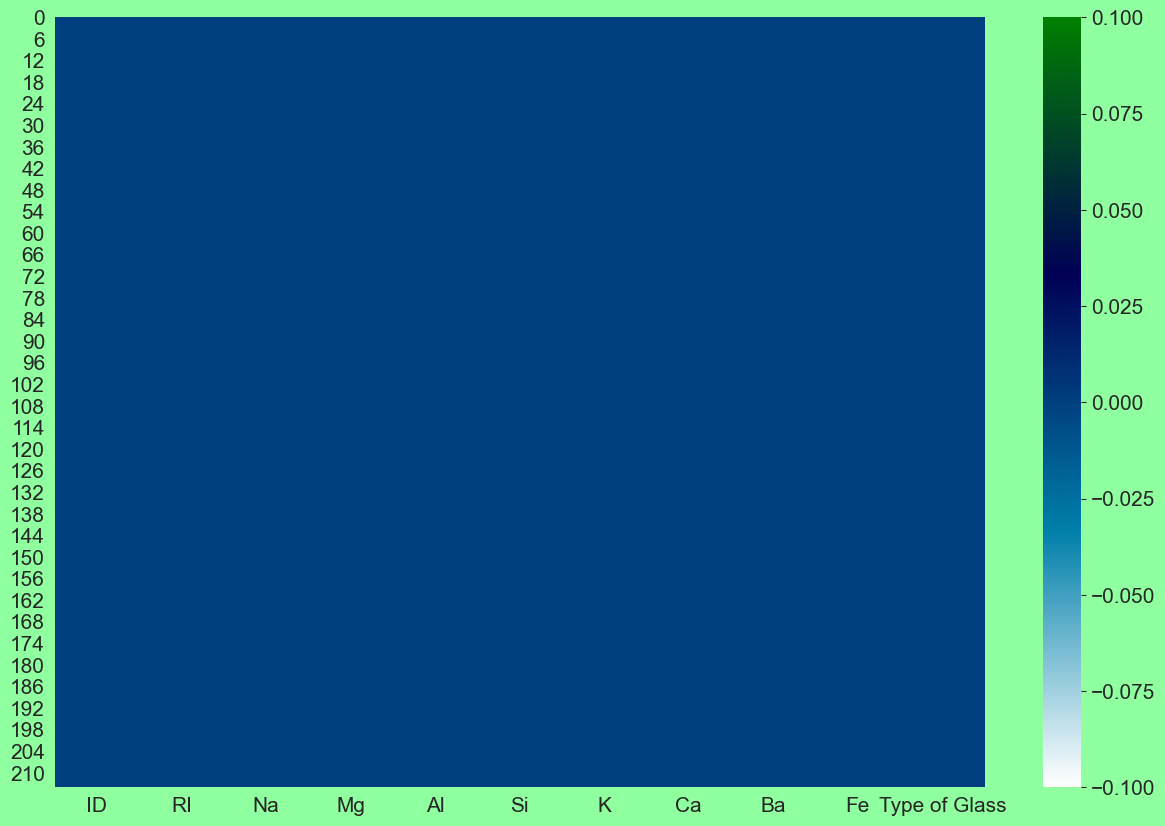

In [14]:
#cvisually showing missing values
sns.heatmap(df.isnull(), cmap='ocean_r')

visually we have seen there is no missing values in the dataset

In [15]:
#to find unique values present in the dataset
df.nunique()

ID               214
RI               178
Na               142
Mg                94
Al               118
Si               133
K                 65
Ca               143
Ba                34
Fe                32
Type of Glass      6
dtype: int64

As id column is just used to number each row so its not useful for our prediction so we will drop it. And our target variable( type of glass) has just 6 unique values so we can judge that its a classification problem.

In [16]:
df.drop(['ID'],axis=1,inplace=True)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [17]:
df["Type of Glass"].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [18]:
df['Type of Glass'].value_counts(sort = False)

1    70
2    76
3    17
5    13
6     9
7    29
Name: Type of Glass, dtype: int64

## Correlation

In [19]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type of Glass,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


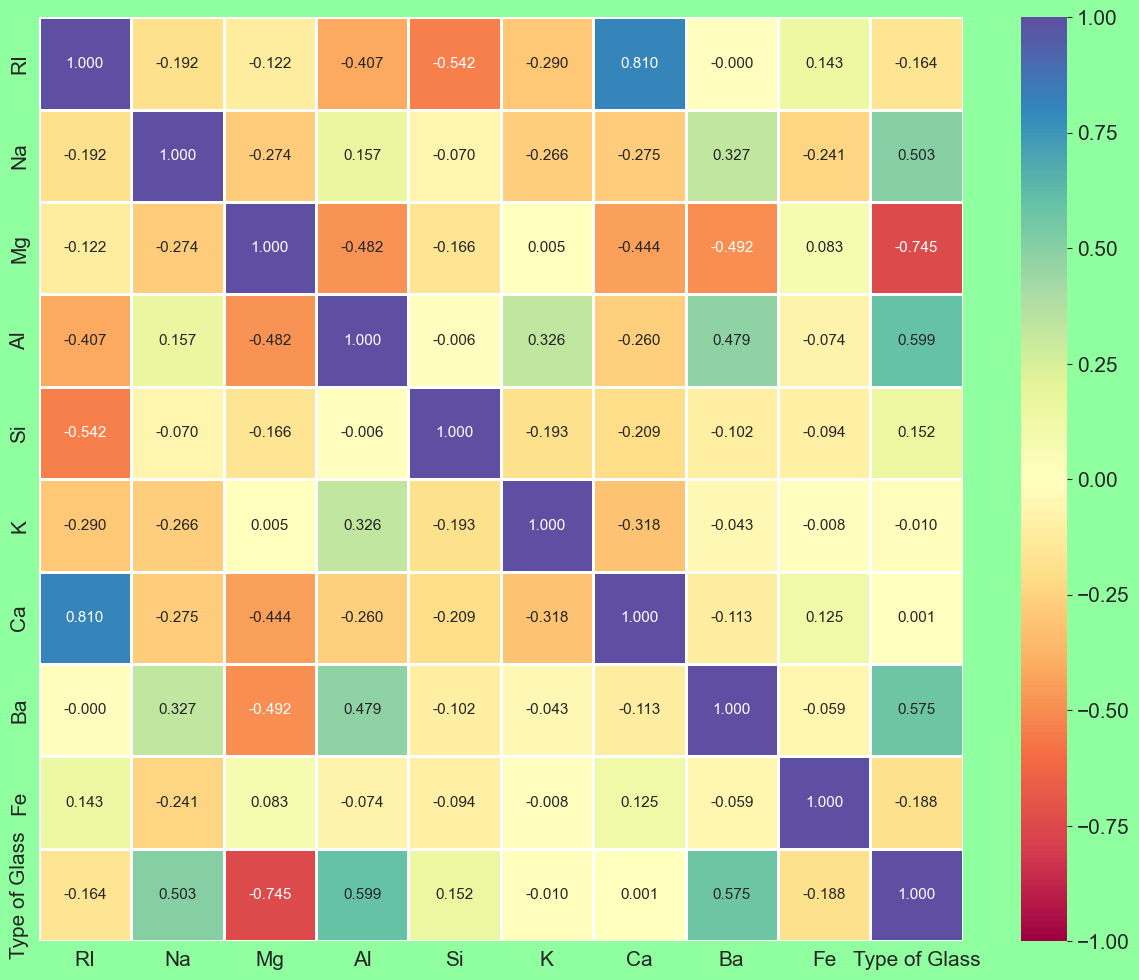

In [20]:
lower_triangle = np.tril(df.corr())
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':11}, cmap="Spectral",linewidth=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

From above we see that the type of glass has high correlation with Barium, Aluminium, Magnesium and Sodium. Also type of glass has almost negligble relation with Calcium so we will drop that column.

In [21]:
df.drop(["Ca"], axis=1, inplace=True)

In [22]:
df

,RI,Na,Mg,Al,Si,K,Ba,Fe,Type of Glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,1.57,0.0,7


## Multivariate analysis

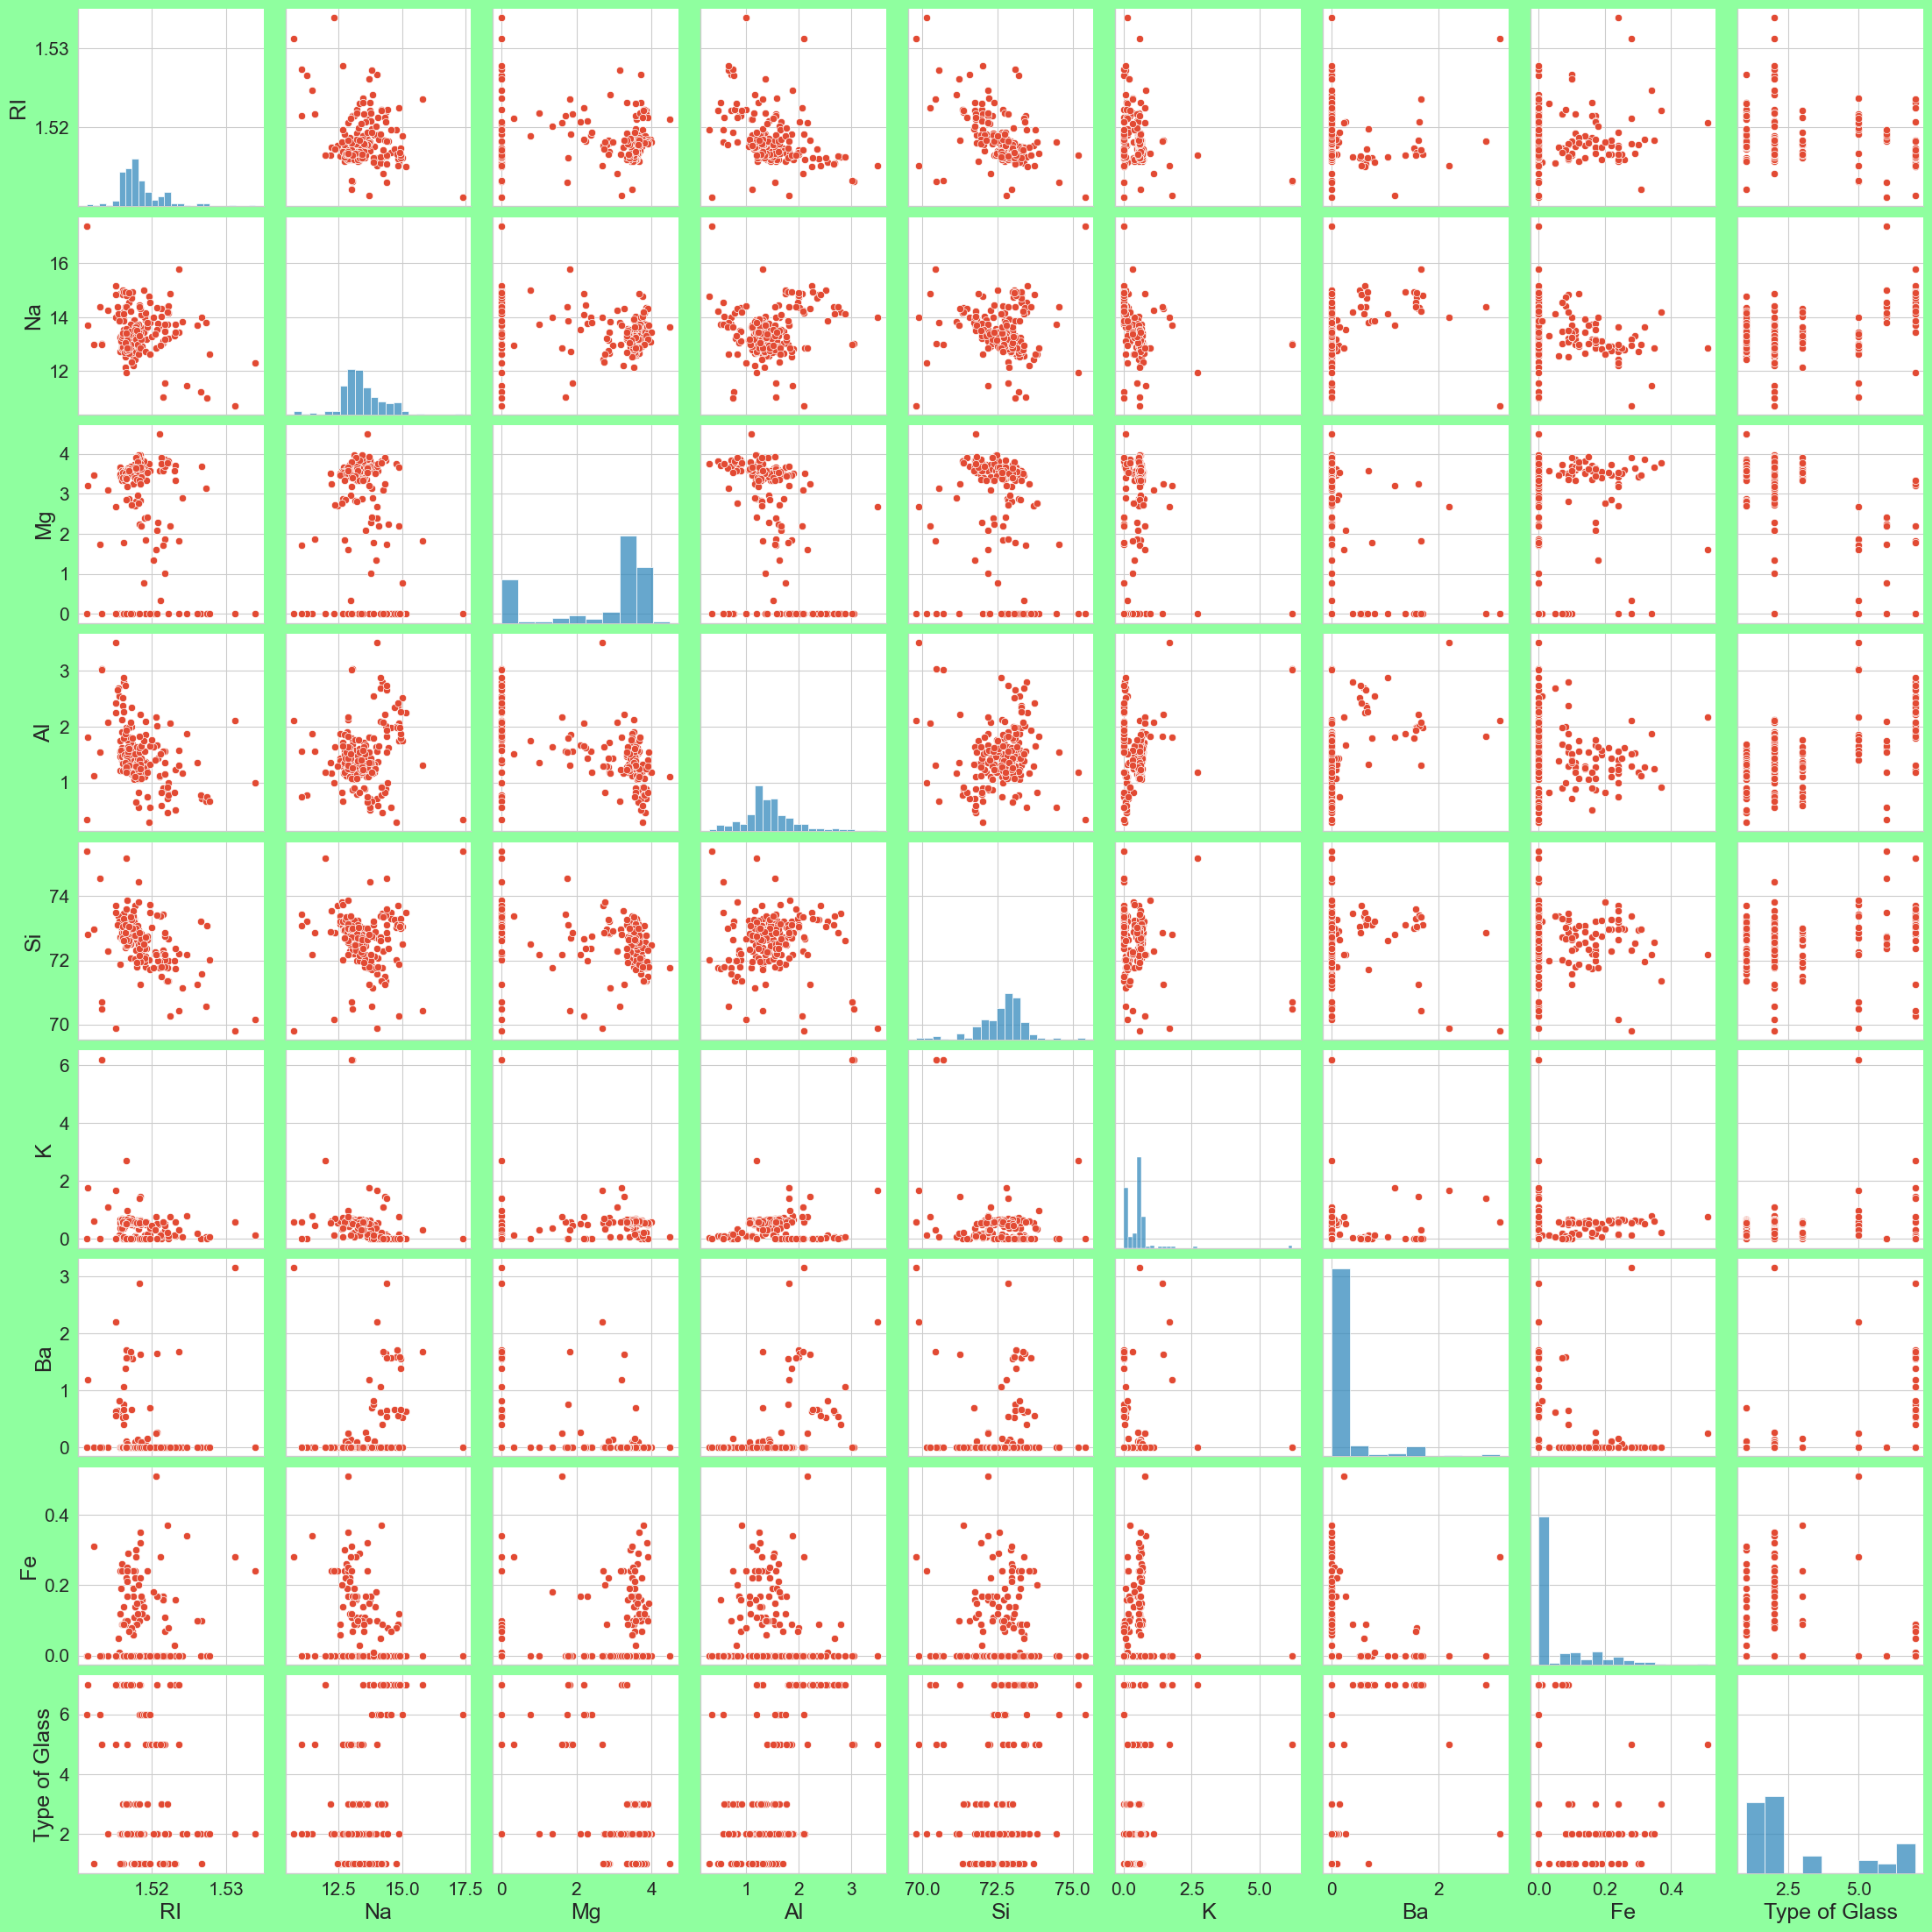

In [23]:
sns.pairplot(df)

## Bivariate analysis

Now as we know that 1-4 type of glass can be considered as window glasses (0) and 5-7 type of glasses can be considerd as non window glasses so we will classify them as 0 and 1 in another list to compare them during the bivariate analysis 

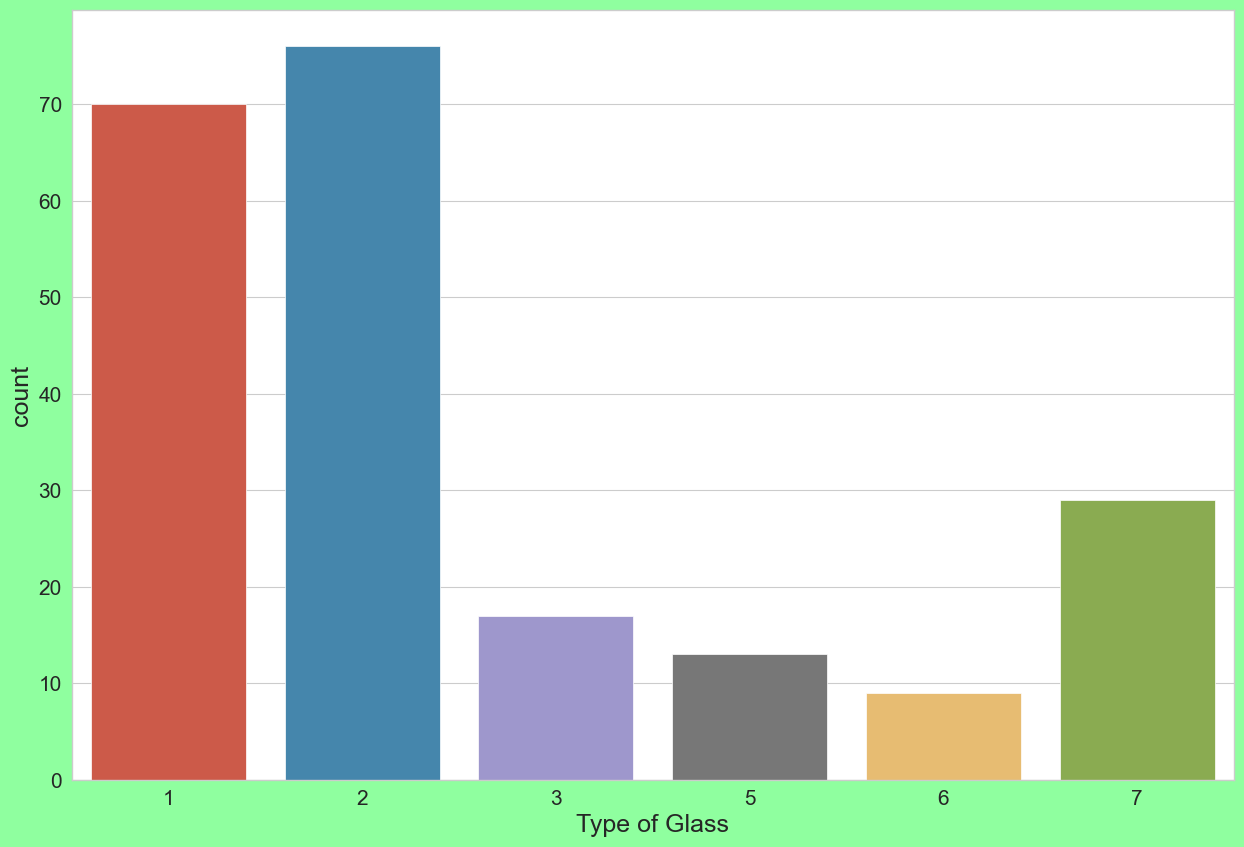

In [24]:
# showcasing the count plot which will count the types of the attributes.
sns.countplot(df['Type of Glass'])
plt.show()

Now as we know that 1-4 type of glass can be considered as window glasses (0) and 5-7 type of glasses can be considerd as non window glasses so we will classify them as 0 and 1 in another list to compare them during the bivariate analysis 

In [25]:
q=[]
for i in df["Type of Glass"]:
    if i <5:
        q.append(0)
    else:
        q.append(1)

<AxesSubplot:ylabel='Al'>

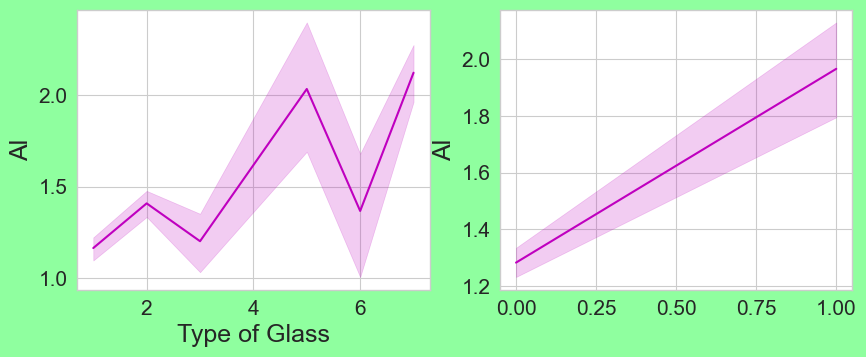

In [26]:
plt.figure(figsize=(10,8))
plt.subplot(221)
sns.lineplot(data=df,y='Al',x='Type of Glass',color='m')
plt.subplot(222)
sns.lineplot(data=df,y='Al',x=q,color='m')

From above we see that 5 and 7 type of glass has the most Aluminum content.

<AxesSubplot:ylabel='Ba'>

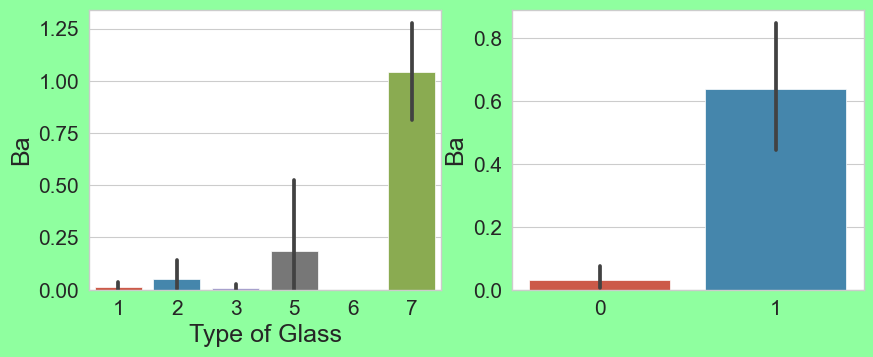

In [27]:
plt.figure(figsize=(10,8))
plt.subplot(221)
sns.barplot(data=df,y='Ba',x='Type of Glass')
plt.subplot(222)
sns.barplot(data=df,y='Ba',x=q)

## Checking for Outliers


RI                  AxesSubplot(0.125,0.653529;0.227941x0.226471)
Na               AxesSubplot(0.398529,0.653529;0.227941x0.226471)
Mg               AxesSubplot(0.672059,0.653529;0.227941x0.226471)
Al                  AxesSubplot(0.125,0.381765;0.227941x0.226471)
Si               AxesSubplot(0.398529,0.381765;0.227941x0.226471)
K                AxesSubplot(0.672059,0.381765;0.227941x0.226471)
Ba                      AxesSubplot(0.125,0.11;0.227941x0.226471)
Fe                   AxesSubplot(0.398529,0.11;0.227941x0.226471)
Type of Glass        AxesSubplot(0.672059,0.11;0.227941x0.226471)
dtype: object

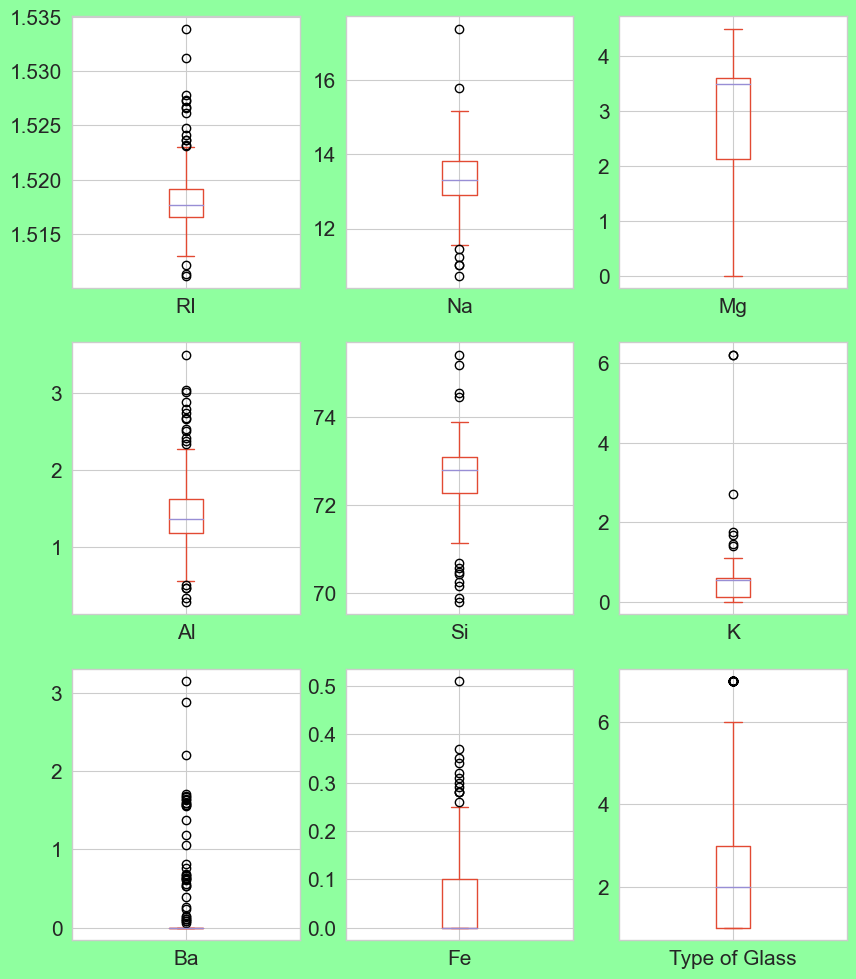

In [28]:
df.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,12))

From above we can see that there are so many outliers present in many of the columns, so we will remove them first

In [29]:
from scipy.stats import zscore,boxcox
z=np.abs(zscore(df))
threshold=3
dfnew=df[(z<3).all(axis=1)]
dfnew

,RI,Na,Mg,Al,Si,K,Ba,Fe,Type of Glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,0.54,0.0,7
209,1.51623,14.14,0.00,2.88,72.61,0.08,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,1.64,0.0,7


Data Loss=(214-198)/214*100= 7.47% . As its below 10% it is acceptable

## Skewness 

In [30]:
dfnew.skew()

RI               1.187750
Na              -0.006770
Mg              -1.407472
Al               0.641092
Si              -0.453578
K                0.302146
Ba               3.229584
Fe               1.509613
Type of Glass    1.311543
dtype: float64

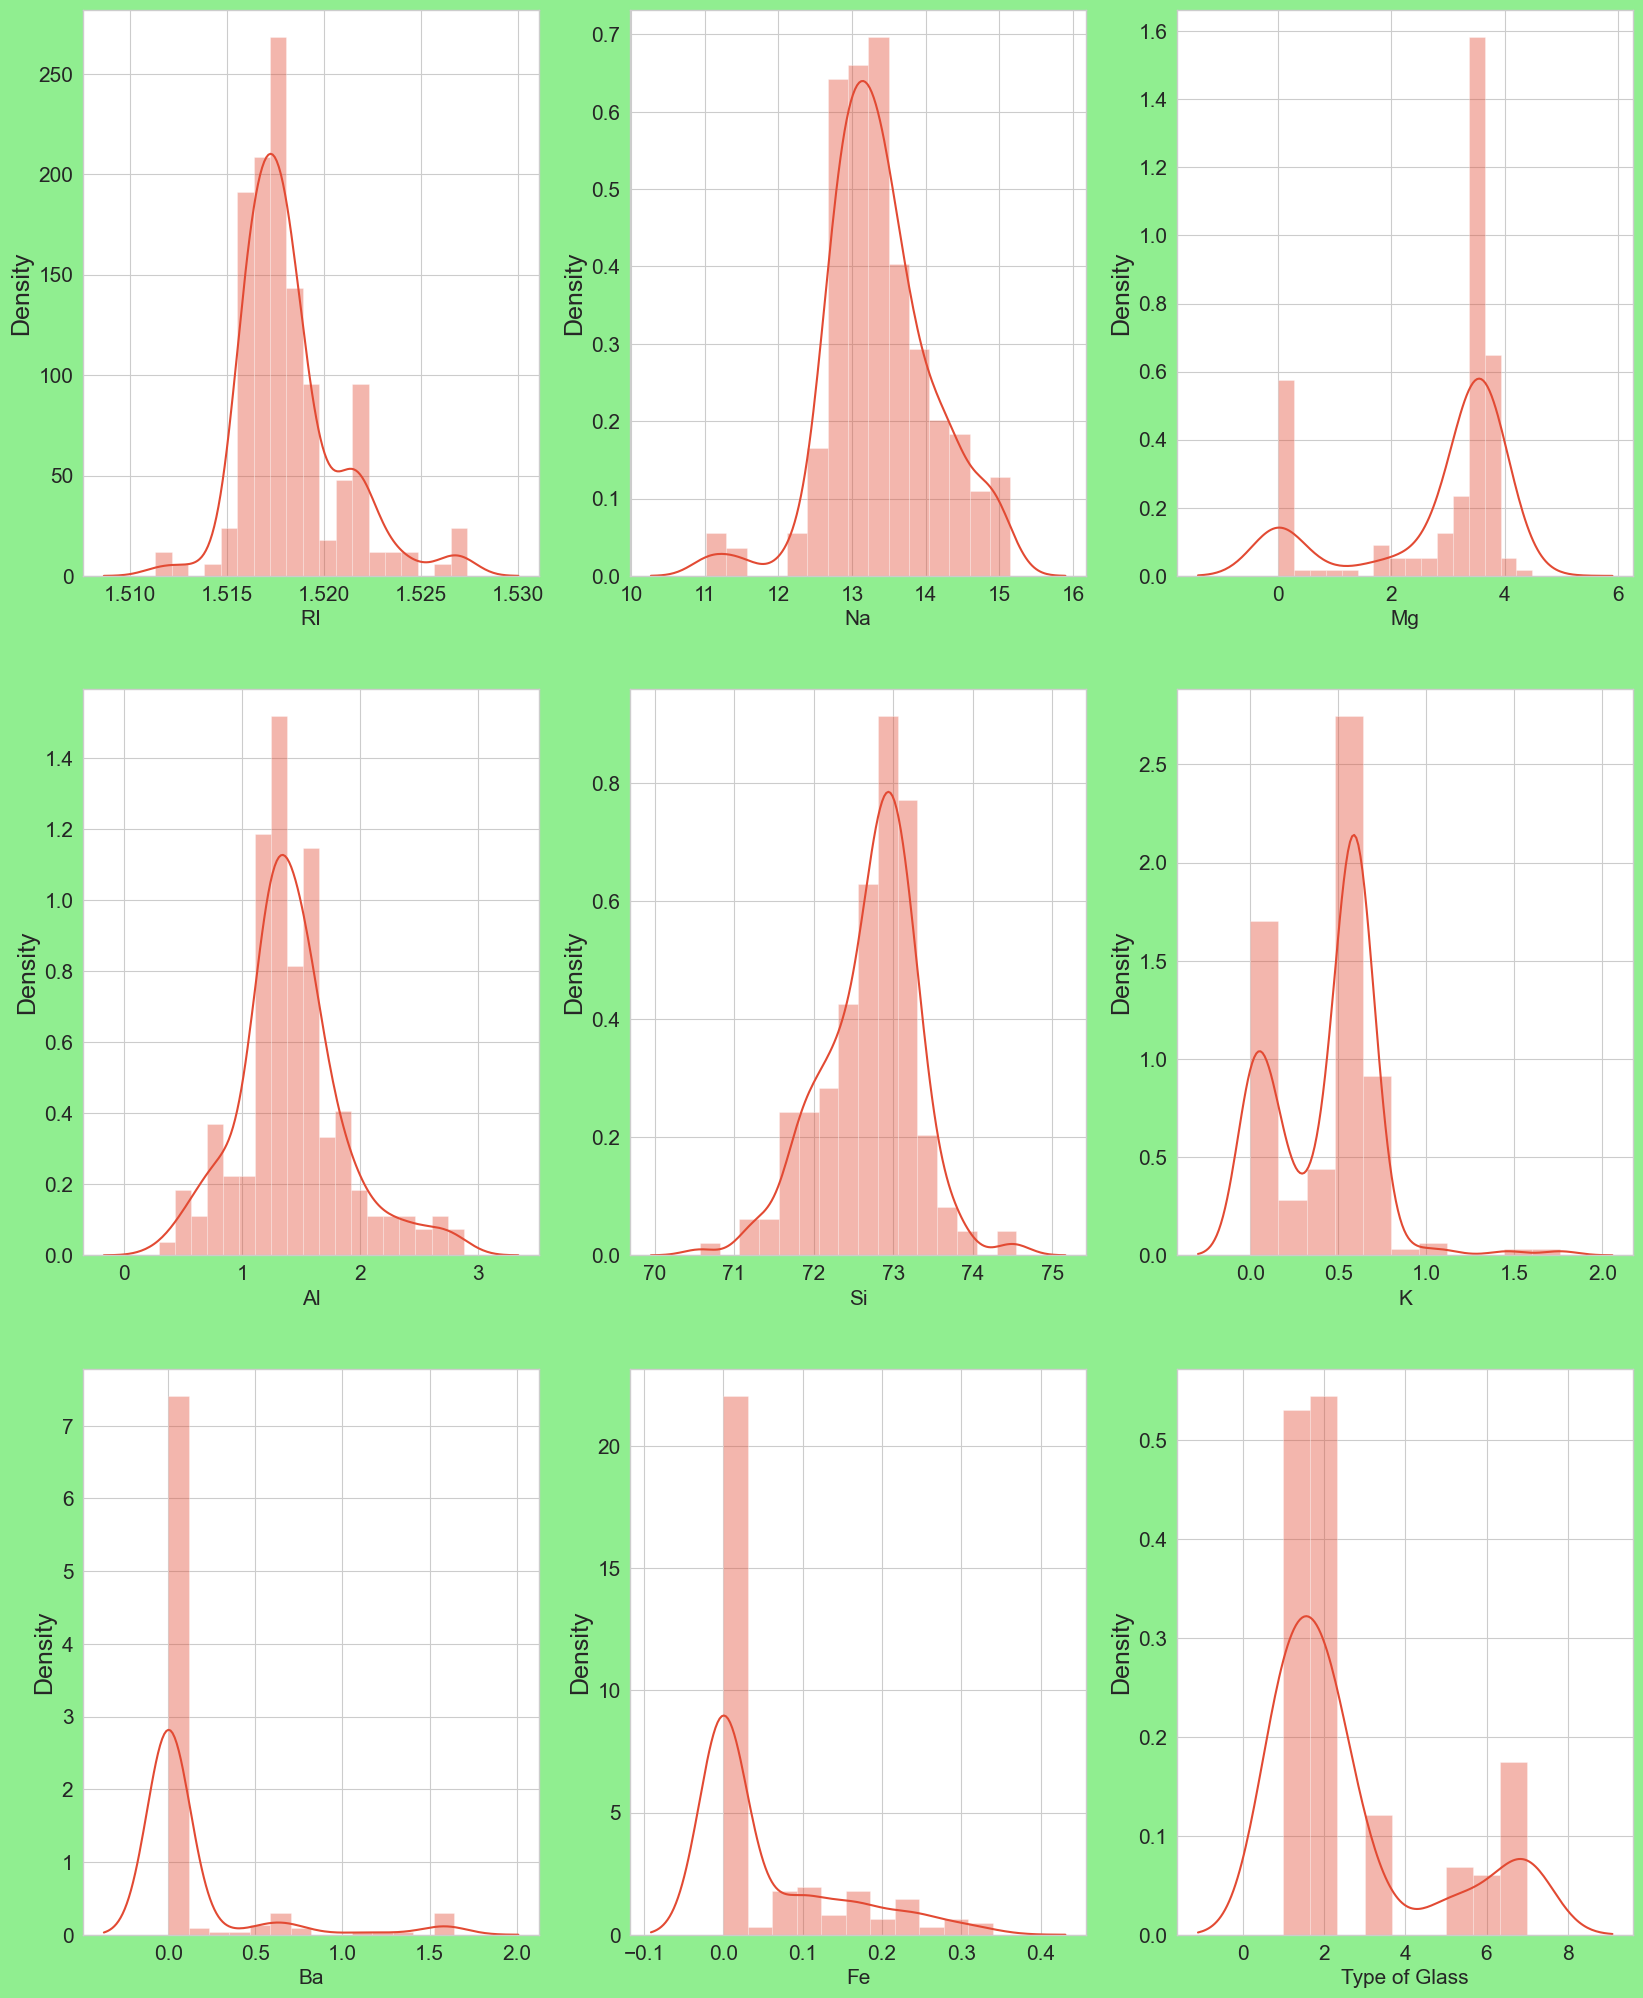

In [31]:
plt.figure(figsize=(20,25),facecolor='lightgreen')
pltno=1

for c in dfnew:
    if pltno<=12:
        ax=plt.subplot(3,3,pltno)
        sns.distplot(dfnew[c])
        plt.xlabel(c,fontsize=15)
        
    pltno+=1

In [32]:
dfnew.skew()

RI               1.187750
Na              -0.006770
Mg              -1.407472
Al               0.641092
Si              -0.453578
K                0.302146
Ba               3.229584
Fe               1.509613
Type of Glass    1.311543
dtype: float64

We can see that there is some skewness present in Barium so we will remove it


In [33]:
dfnew['Ba']=np.cbrt(dfnew['Ba'])

In [34]:
dfnew.skew()

RI               1.187750
Na              -0.006770
Mg              -1.407472
Al               0.641092
Si              -0.453578
K                0.302146
Ba               2.242363
Fe               1.509613
Type of Glass    1.311543
dtype: float64

In [35]:
dfnew['Ba']=np.cbrt(dfnew['Ba'])

In [36]:
dfnew.skew()

RI               1.187750
Na              -0.006770
Mg              -1.407472
Al               0.641092
Si              -0.453578
K                0.302146
Ba               1.957067
Fe               1.509613
Type of Glass    1.311543
dtype: float64

Skewness is decreased from barium

In [37]:
#checking the data, how the target data spreaded

q=[]
for i in dfnew["Type of Glass"]:
    if i <5:
        q.append(0)
    else:
        q.append(1)
dfnew["Type of Glass"]=q

0    158
1     40
Name: Type of Glass, dtype: int64


<AxesSubplot:xlabel='Type of Glass', ylabel='count'>

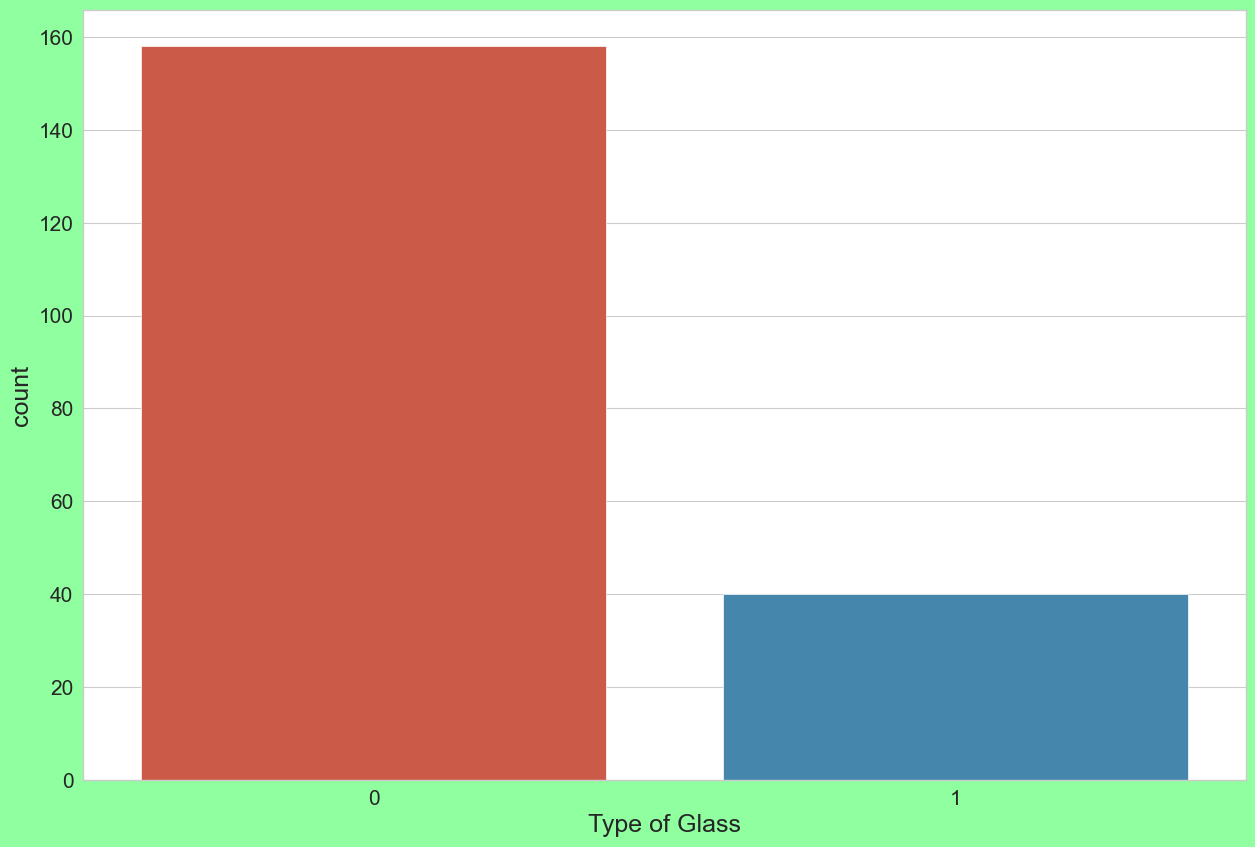

In [38]:
print(dfnew["Type of Glass"].value_counts())
sns.countplot(x=dfnew['Type of Glass'])

#data is not balanced so we just balance the data.

## Standardizing the data

In [39]:
#splitting the data
X=dfnew.drop(['Type of Glass'],axis=1)
Y=dfnew['Type of Glass']
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X = sc.fit_transform(X)
scaled_X

array([[ 1.09649497,  0.35526026,  1.23192305, ..., -1.29612636,
        -0.42797405, -0.60420484],
       [-0.2428874 ,  0.70396903,  0.57467364, ...,  0.1836357 ,
        -0.42797405, -0.60420484],
       [-0.80621587,  0.20182841,  0.53774951, ..., -0.13345617,
        -0.42797405, -0.60420484],
       ...,
       [-0.54227876,  2.14064913, -2.08386329, ..., -1.50752094,
         2.64193258, -0.60420484],
       [ 0.95467801,  1.3595415 , -2.08386329, ..., -1.50752094,
         2.652512  , -0.60420484],
       [-0.67621699,  1.3874382 , -2.08386329, ..., -1.50752094,
         2.63761782, -0.60420484]])

## Checking multicollinearity using VIF

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif

,Features,vif
0,RI,6.377031
1,Na,3.814187
2,Mg,4.877212
3,Al,3.673578
4,Si,4.691901
5,K,2.611483
6,Ba,2.054969
7,Fe,1.087846


As no value is more than 10 so all the values are in acceptable range and thus there is no multicollinearity present

We can see that every column is in the acceptable range

## Balancing the data 

In [41]:
from imblearn.over_sampling import SMOTE
smt= SMOTE(random_state=3)
train_x,train_y=smt.fit_resample(scaled_X,Y)
train_y.value_counts()

0    158
1    158
Name: Type of Glass, dtype: int64

data is balanced

<AxesSubplot:xlabel='Type of Glass', ylabel='count'>

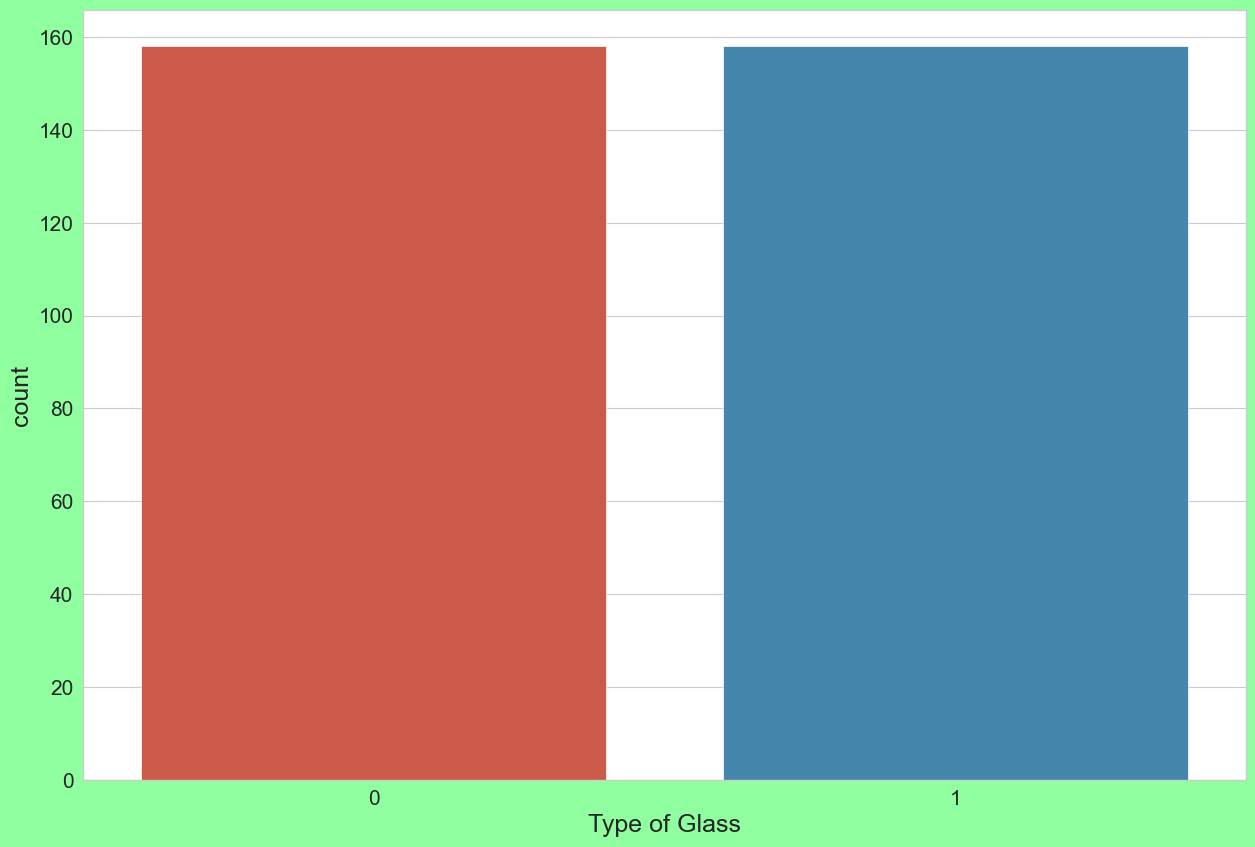

In [42]:
sns.countplot(x=train_y)

# *******************************

### Model Creation
The Classification algorithm is a Supervised Learning technique that is used to identify the category of new observations on the basis of training data. In Classification, a program learns from the given dataset or observations and then classifies new observation into a number of classes or groups.

Here after visualizing the dataset I have decided to go with these models -
* **Logistic Regression** : Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).


* **Decision Tree Classifier** : Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.


* **Random Forest Classifier** : Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.


* **Gausian NB** : This method is expected to be called several times consecutively on different chunks of a dataset so as to implement out-of-core or online learning. This is especially useful when the whole dataset is too big to fit in memory at once. This method has some performance and numerical stability overhead, hence it is better to call partial_fit on chunks of data that are as large as possible (as long as fitting in the memory budget) to hide the overhead.


* **KNN algorithm** : K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories. K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.


* **Support Vector Machine Algorithm** : Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.


* **XgBoost Classifier Algortihm** : XGBoost provides a wrapper class to allow models to be treated like classifiers or regressors in the scikit-learn framework. The XGBoost model for classification is called XGBClassifier. We can create and and fit it to our training dataset. Models are fit using the scikit-learn API and the model.


* **Gradient Boosting Algorithm** : Gradient boosting is a machine learning technique for regression, classification and other tasks, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.



* **AdaBoosting Algorithm** : AdaBoost, short for Adaptive Boosting, is a statistical classification meta-algorithm formulated by Yoav Freund and Robert Schapire, who won the 2003 Gödel Prize for their work. It can be used in conjunction with many other types of learning algorithms to improve performance.


* **MLP Classifier Algorithm** : MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.


* **Gradient Descent Classifier** : Stochastic Gradient Descent (SGD) is a simple yet efficient optimization algorithm used to find the values of parameters/coefficients of functions that minimize a cost function. In other words, it is used for discriminative learning of linear classifiers under convex loss functions such as SVM and Logistic regression.


Let's deploy the models!!

Now, as we have done all the required visualisations and data wrangling/cleaning operations, we shall focus on applying numerous ML algorithms to see if we can predict the glasses accurately or, not.

### Splitting the data into train and test data
  
  * Importing the library from the sklearn.model_selection
  * Split the dataset into 75:25 ratio
  * X_train and y_train are the trainning datasets
  * X_test and y_test are the testing datasets
  * After the spliting of the datasets the model is ready to be prepared!

## Fitting the models now


In [43]:
models=[GaussianNB(),LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),SVC()]

In [44]:
maxAcc = 0
maxRS = 0

for i in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(train_x,train_y,test_size = .25, random_state=i)
    for m in models:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        pred = m.predict(x_test)
        acc = accuracy_score(y_test,pred)
        if acc>maxAcc:
            maxAcc = acc
            maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 1.0 on Random State: 11


In [45]:
x_train,x_test,y_train,y_test = train_test_split(train_x,train_y,test_size = .30, random_state=8)

In [46]:
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of', m, 'is: ',accuracy_score(y_test,predm))
    print ('\n','Confusion matrix:','\n',confusion_matrix(y_test,predm))
    print ('\n','Classification Report:','\n',classification_report(y_test,predm))
    print('\n')

Accuracy score of GaussianNB() is:  0.8947368421052632

 Confusion matrix: 
 [[46  2]
 [ 8 39]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90        48
           1       0.95      0.83      0.89        47

    accuracy                           0.89        95
   macro avg       0.90      0.89      0.89        95
weighted avg       0.90      0.89      0.89        95



Accuracy score of LogisticRegression() is:  0.9263157894736842

 Confusion matrix: 
 [[46  2]
 [ 5 42]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93        48
           1       0.95      0.89      0.92        47

    accuracy                           0.93        95
   macro avg       0.93      0.93      0.93        95
weighted avg       0.93      0.93      0.93        95



Accuracy score of RandomForestClassifier() is:  0.9789473684210527

 Confusion matrix: 


### the best Accuracy score  RandomForestClassifier() and SVC() IS :  0.9789473684210527

From above we see that RFC is also best accuracy so we will use for gradient boosting


In [47]:
from sklearn.model_selection import cross_val_score
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [48]:
pred = rfc.predict(x_test)
ls=accuracy_score(y_test,pred)
lscore= cross_val_score(rfc,x_train,y_train)
lsc=lscore.mean()

lscore_selected=cross_val_score(rfc,x_train,y_train,cv=6).mean()
print("The cv score is: ", lscore_selected,"\nThe accuracy score is: ", ls)

The cv score is:  0.9728478478478478 
The accuracy score is:  0.968421052631579


## Hyperparameter Tuning 

In [49]:
param={'max_features':['auto','sqrt','log2'],
      'max_depth':(10,100),
      'criterion':['gini','entropy'],}
gss=GridSearchCV(rfc,param,cv=5)
gss.fit(x_train,y_train)
gss.best_params_

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt'}

In [50]:
final_model=RandomForestClassifier(max_features='auto',criterion='gini',max_depth=10)
final_model.fit(x_train, y_train)
fmod_pred = final_model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 97.89473684210527


## ROC curve

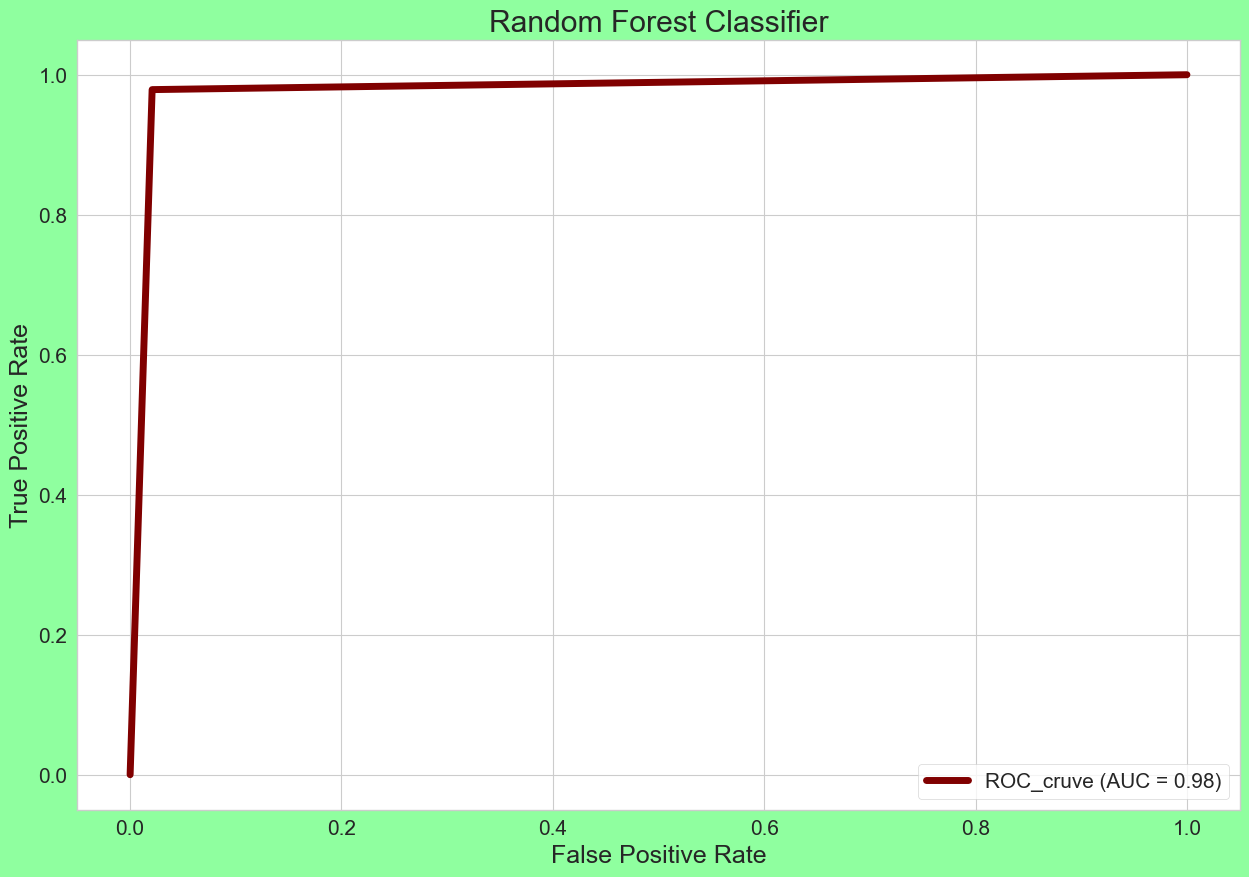

In [51]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(fmod_pred, y_test)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='ROC_cruve')
display.plot(lw=5,color='maroon')
plt.title('Random Forest Classifier')
plt.show()

### Plotting Confusion Matrix

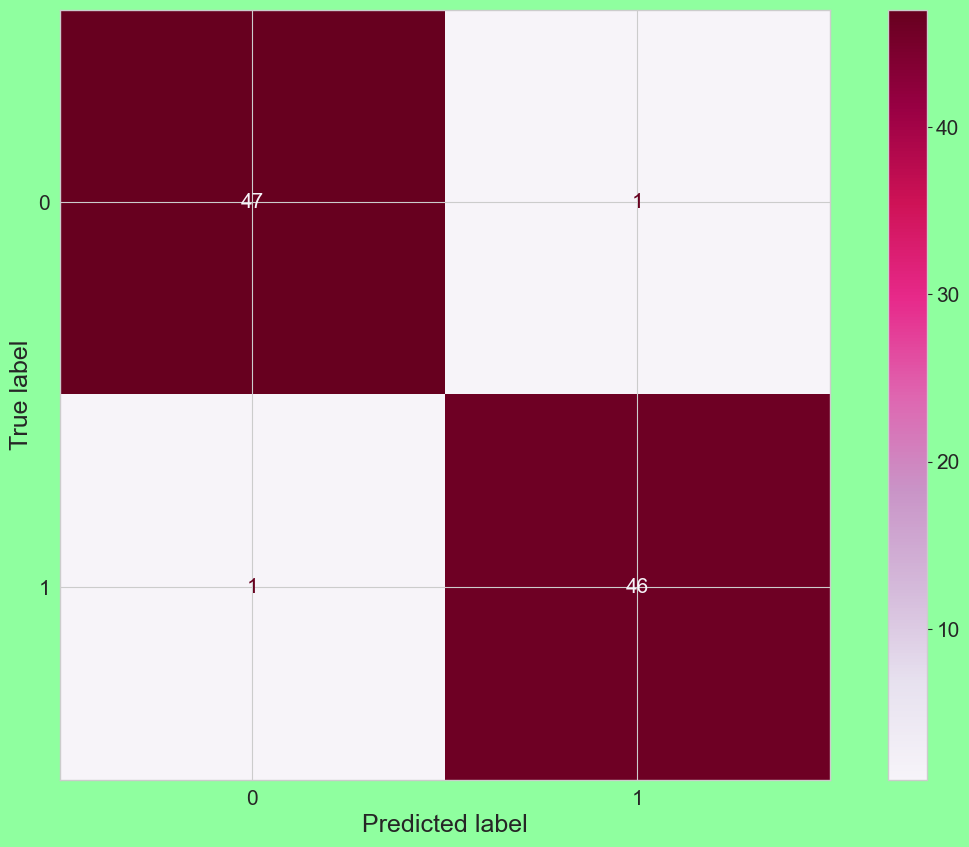

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, fmod_pred)
cm_display = ConfusionMatrixDisplay(cm).plot(cmap='PuRd')

In [53]:
dfnew.head()

,RI,Na,Mg,Al,Si,K,Ba,Fe,Type of Glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,0.0,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,0.0,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,0.0,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,0.0,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,0.0,0.0,0


In [54]:
#BULDING THE PREDICTION SYSTEM
input_data = (1.5172,13.7,3.62,1.24,73.08,0.55,0.0,0.0)
input_data_array = np.asarray(input_data)

#reshaping the data so that it works for only one instance at a time
input_data_reshaped = input_data_array.reshape(1,-1)

prediction = final_model.predict(input_data_reshaped)
print("Predicted passenger data:",str(prediction))

Predicted passenger data: [0]


## Saving the model 

In [55]:
import joblib
joblib.dump(final_model,'glass_identification.pkl')

['glass_identification.pkl']

In [56]:
def glass_ident(x):
    array=np.asarray(x)
    reshaped=array.reshape(1,-1)
    prediction=rfc.predict(reshaped)
    if prediction==0:
        print('The type of glass is window')
    else:
        print('The type of glass is non-window')

In [57]:
glass_ident([1,11.7,2.4,1.5,73,0.3,1.4,0])

The type of glass is window


In [58]:
glass_ident([1.51651,14.38,0.0,1.94,73.61,0.00,1.162251,0.0])

The type of glass is non-window


## model predicting the right answer

### ---thank you ---